In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import pearsonr
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from pylab import rcParams
import matplotlib.ticker as mt
from matplotlib.ticker import ScalarFormatter

<a id='top'></a>
# World Food Programme: food price and affordability analysis
#### Data understanding and preparation
### [International Labour Orgaizaion: Average monthly earnings by country](https://www.ilo.org/shinyapps/bulkexplorer40/?lang=en&id=EAR_4MTH_SEX_ECO_CUR_NB_A) 

#### [Data understanding](#understanding)

#### [Data wrangling](#wrangling)

#### [Data cleaning](#cleaning)

#### [Distribution analysis](#distribution)


<a id='understanding'></a>
### Data understanding
[Back to top](#top)

In [3]:
path=r'C:\Users\frauz\Documents\Python Projects\Final Project\Data' #creating a path

In [4]:
df_earn=pd.read_csv(os.path.join(path,'average_annual_salary.csv'),index_col=False) #importing data

In [5]:
df_earn.head()

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Aruba,Average monthly earnings of employees by sex a...,PC - Population and Housing Census,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2010,3013.00,NaN,NaN,Currency: ABW - Florin (AWG) | Job coverage: M...,Data reference period: September
1,Afghanistan,Average monthly earnings of employees by sex a...,LFS - Labour Force Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2020,13202.24,NaN,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...
2,Afghanistan,Average monthly earnings of employees by sex a...,HIES - Households Living Conditions Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2014,8848.57,NaN,NaN,Currency: AFG - Afghani (AFN),Repository: ILO-STATISTICS - Micro data proces...
3,Angola,Average monthly earnings of employees by sex a...,LFS - Employment Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2021,90678.80,NaN,NaN,Currency: AGO - Kwanza (AOA),Repository: ILO-STATISTICS - Micro data proces...
4,Angola,Average monthly earnings of employees by sex a...,LFS - Employment Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2019,82234.66,NaN,NaN,Currency: AGO - Kwanza (AOA) | Break in series...,Repository: ILO-STATISTICS - Micro data proces...


In [6]:
df_earn[df_earn['ref_area.label']=='Timor-Leste']

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
2806,Timor-Leste,Average monthly earnings of employees by sex a...,LFS - Labour Force Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2021,257.59,NaN,NaN,Currency: TLS - United States dollar (USD),Repository: ILO-STATISTICS - Micro data proces...
2807,Timor-Leste,Average monthly earnings of employees by sex a...,LFS - Labour Force Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2016,340.37,NaN,NaN,Currency: TLS - United States dollar (USD),Repository: ILO-STATISTICS - Micro data proces...
2808,Timor-Leste,Average monthly earnings of employees by sex a...,LFS - Labour Force Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2013,412.77,NaN,NaN,Currency: TLS - United States dollar (USD) | B...,Repository: ILO-STATISTICS - Micro data proces...
2809,Timor-Leste,Average monthly earnings of employees by sex a...,LFS - Labour Force Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2010,173.77,NaN,NaN,Currency: TLS - United States dollar (USD) | B...,Repository: ILO-STATISTICS - Micro data proces...
2810,Timor-Leste,Average monthly earnings of employees by sex a...,HIES - Living Standards Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2007,162.04,NaN,NaN,Currency: TLS - United States dollar (USD),Repository: ILO-STATISTICS - Micro data proces...
2811,Timor-Leste,Average monthly earnings of employees by sex a...,HIES - Living Standards Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2001,1498488.38,NaN,NaN,Currency: TLS - Timorese escudo (TPE),Repository: ILO-STATISTICS - Micro data proces...


In [6]:
df_earn.info() #analysing data shape ad data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ref_area.label        3084 non-null   object 
 1   indicator.label       3084 non-null   object 
 2   source.label          3084 non-null   object 
 3   sex.label             3084 non-null   object 
 4   classif1.label        3084 non-null   object 
 5   classif2.label        3084 non-null   object 
 6   time                  3084 non-null   int64  
 7   obs_value             3084 non-null   float64
 8   obs_status.label      0 non-null      float64
 9   note_classif.label    765 non-null    object 
 10  note_indicator.label  3084 non-null   object 
 11  note_source.label     2188 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 289.2+ KB


In [7]:
df_earn.describe().apply(lambda s: s.apply('{0:.5f}'.format)) # basic statistics

,time,obs_value,obs_status.label
count,3084.00000,3084.00000,0.00000
mean,2002.41440,45400014.29387,nan
std,13.86877,1699840905.60512,nan
min,1969.00000,0.00000,nan
25%,1992.00000,783.51750,nan
50%,2005.00000,2835.19000,nan
75%,2014.00000,14191.63000,nan
max,2022.00000,87400000000.00000,nan


<a id='wrangling'></a>
### Data wrangling
[Back to top](#top)

In [9]:
#Step 1: Renaming the colums that will be used in the analysis. LC stands for local curency

df_earn.rename(columns={'ref_area.label':'country','time':'year','obs_value':'avg_earning_LC'}, inplace=True)

In [10]:
df_earn.head()

,country,indicator.label,source.label,sex.label,classif1.label,classif2.label,year,avg_earning_LC,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Aruba,Average monthly earnings of employees by sex a...,PC - Population and Housing Census,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2010,3013.00,NaN,NaN,Currency: ABW - Florin (AWG) | Job coverage: M...,Data reference period: September
1,Afghanistan,Average monthly earnings of employees by sex a...,LFS - Labour Force Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2020,13202.24,NaN,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...
2,Afghanistan,Average monthly earnings of employees by sex a...,HIES - Households Living Conditions Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2014,8848.57,NaN,NaN,Currency: AFG - Afghani (AFN),Repository: ILO-STATISTICS - Micro data proces...
3,Angola,Average monthly earnings of employees by sex a...,LFS - Employment Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2021,90678.80,NaN,NaN,Currency: AGO - Kwanza (AOA),Repository: ILO-STATISTICS - Micro data proces...
4,Angola,Average monthly earnings of employees by sex a...,LFS - Employment Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2019,82234.66,NaN,NaN,Currency: AGO - Kwanza (AOA) | Break in series...,Repository: ILO-STATISTICS - Micro data proces...


In [11]:
df_earn.columns

Index(['country', 'indicator.label', 'source.label', 'sex.label',
       'classif1.label', 'classif2.label', 'year', 'avg_earning_LC',
       'obs_status.label', 'note_classif.label', 'note_indicator.label',
       'note_source.label'],
      dtype='object')

In [12]:
# Step 2: Droppig the columns that are not required for the analysis
df_earn=df_earn.drop(columns=['indicator.label', 'source.label', 'sex.label','classif1.label', 'classif2.label','obs_status.label', 'note_classif.label', 'note_indicator.label','note_source.label'])

In [13]:
df_earn.dtypes # Data types are correct. No need to change them

country            object
year                int64
avg_earning_LC    float64
dtype: object

<a id='cleaning'></a>
### Data cleaning
[Back to top](#top)

In [14]:
# Step 1: Checking for missing values revealed none
df_earn.isnull().sum()

country           0
year              0
avg_earning_LC    0
dtype: int64

In [15]:
#Step 2: Checking for duplicates revealed none
df_earn.duplicated().value_counts()

False    3084
dtype: int64

<a id='distribution'></a>
### Distribution analysis
[Back to top](#top)

In [16]:
# Analyzing the number of countries in the data set
df_earn['country'].value_counts()

United States        54
China                53
Netherlands          53
Bulgaria             53
Poland               53
                     ..
Cameroon              1
Eswatini              1
Brunei Darussalam     1
Chad                  1
Aruba                 1
Name: country, Length: 184, dtype: int64

In [17]:
# Normalizing the variables in order to plot the distribution
var=df_earn[['year','avg_earning_LC']].values # extracting values from the columns

scaler=preprocessing.MinMaxScaler() # scaling the data in each column
var_scaled=scaler.fit_transform(var)

df_scaled=pd.DataFrame(var_scaled) # creating a new dataframe of scaled data
df_scaled.columns=['year','avg_earning_LC']

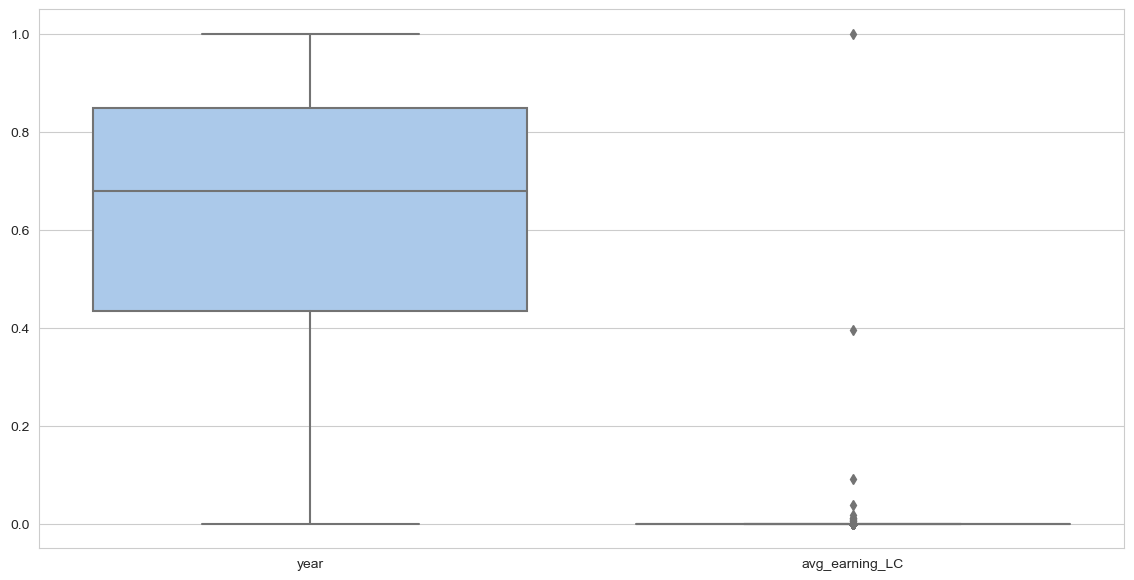

In [21]:
%matplotlib inline
rcParams['figure.figsize']=14,7
sns.set_style('whitegrid')
dist_boxplot=sns.boxplot(data=df_scaled, palette='pastel') # plotting the normalized data 

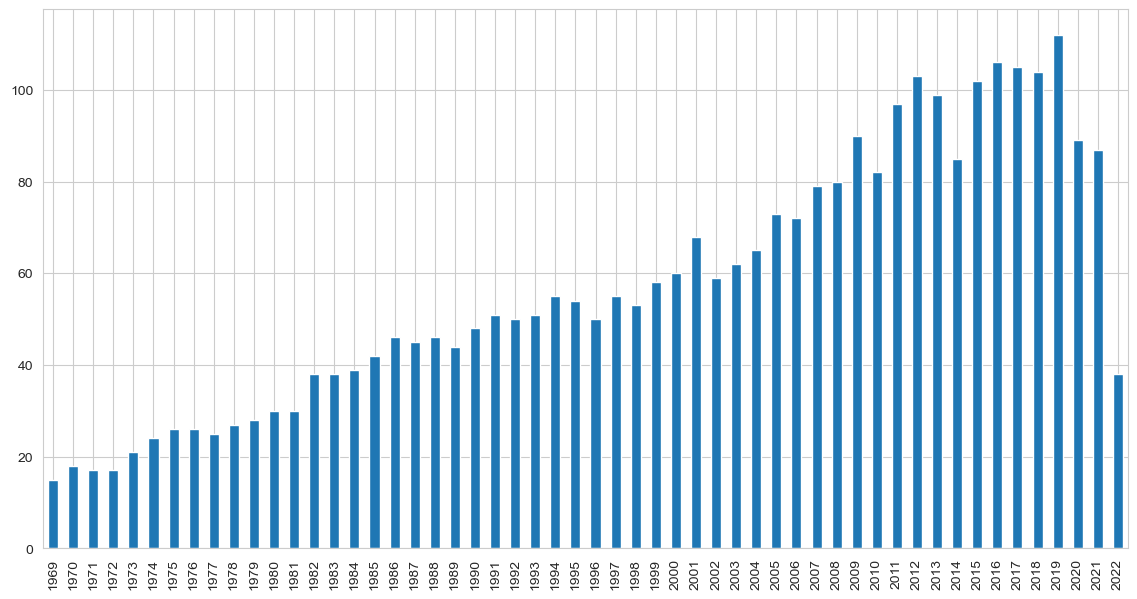

In [24]:
# Plotting the year column distribution

year_dist=df_earn['year'].value_counts().sort_index().plot(kind='bar')

In [37]:
# Analysing the distribution of 'avg_earning_LC' column

df_earn.iloc[df_earn['avg_earning_LC'].idxmax()] #finding the record with the maximum value

country                 Belarus
year                       2000
avg_earning_LC    87400000000.0
Name: 338, dtype: object

In [42]:
df_earn[df_earn['country']=='Belarus']
# Belarusian currency has been redenominated twice since 1995. So, these extremely high values look logical within the context

,country,year,avg_earning_LC
292,Belarus,1994,9.820300e+04
293,Belarus,1993,6.120800e+04
294,Belarus,1992,5.072000e+03
295,Belarus,1991,5.410000e+02
296,Belarus,1990,2.690000e+02
297,Belarus,1989,2.260000e+02
298,Belarus,1988,2.060000e+02
299,Belarus,1987,1.890000e+02
300,Belarus,1986,1.810000e+02
301,Belarus,1985,1.750000e+02


In [44]:
# Exporting the data for further analysis 
df_earn.to_pickle(os.path.join(path,'Data Prepared','average_earning_prepared.pkl'))